In [1]:
# Salary_Data.csv

In [3]:
#importing libraries

import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score



In [4]:
df=pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [18]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [20]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [13]:
df['Salary'].nunique(),df['YearsExperience'].nunique(),

(30, 28)

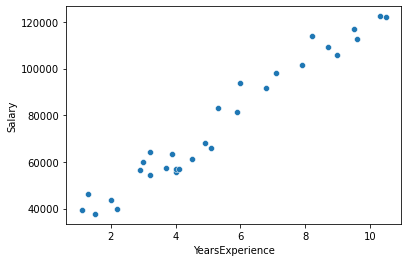

In [15]:
sns.scatterplot(data=df,x='YearsExperience',y='Salary');

We have positive correlation between dependent and independent variable

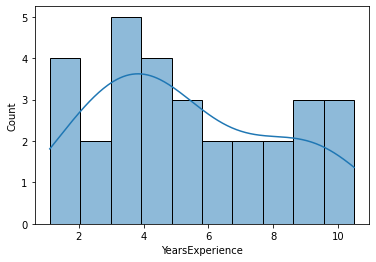

In [27]:
sns.histplot(data=df,x='YearsExperience',bins=10,kde=True);

Most of the people in the given dataset has experience below 6 years. 

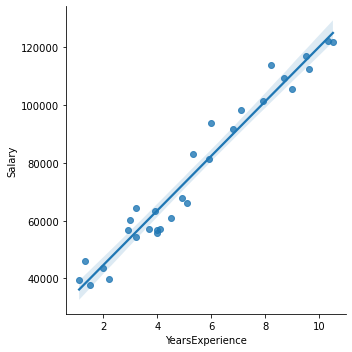

In [29]:
sns.lmplot(data=df, x='YearsExperience',y='Salary');

Visualisation of the best fit line

##### Splitting the dataset

In [46]:
x=df.iloc[:,0]
y=df.iloc[:,-1]

In [47]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=99)

In [48]:
x_train=x_train[:,np.newaxis]
x_test= x_test[:,np.newaxis]

C:\Users\siddh\AppData\Local\Temp\ipykernel_10412\3489550626.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train=x_train[:,np.newaxis]
C:\Users\siddh\AppData\Local\Temp\ipykernel_10412\3489550626.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_test= x_test[:,np.newaxis]


#### Training the Model

In [49]:
model=LinearRegression()

In [51]:
model.fit(x_train,y_train)

LinearRegression()

In [52]:
y_pred= model.predict(x_test)

#### Model Evaluation

In [53]:
r2_score=r2_score(y_test,y_pred)

In [54]:
r2_score

0.9494534182322683

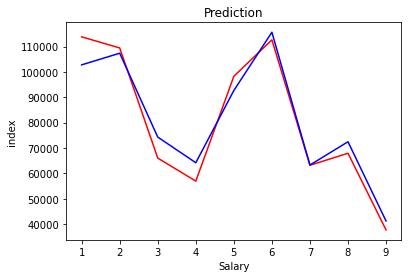

In [55]:
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()